# Diagrama de Coordenadas Paralelas
Gráfico con el que podemos comparar varias observaciones **individuales** a través de los valores de sus variables. Es un gráfico que solo consiste de múltiples Ejes Y. Cada Eje representa el rango de una variable de interés. Los valores que toman las variables de una misma observación se conectan con līneas. De este modo podemos hallar como se encuentran relacionadas las variables.    
**Ejes Y**: Variable numérica o categórica 

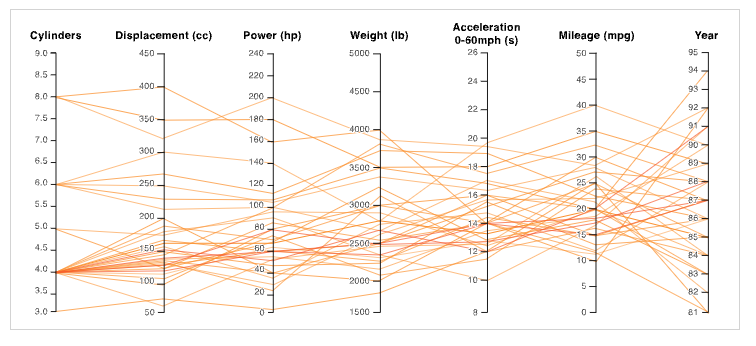


### Cuando utilizar
- Quiero comparar como se relacionan diversas variables numéricas de observaciones individuales. 
- Es una alternativa superior al Radar Chart, ya que no importa la escala de mis variables. 


### Consejos
- Puedo introducir una variable diferenciadora categórica que quiera explorar utilizando diferentes colores en las líneas.
- Si tengo muchos puntos puede volverse dificil de entender. Para solucionar esto puedo muestrear observaciones o jugar con las opacidades de las líneas.
- Es un gráfico con usos limitados ya que facilmente se vuelve complejo de entender y caótico debido a la gran cantidad de líneas. 




## En esta clase
### Datos
Información sobre especies de pinguinos
### Objetivos
1. Como se comparan las medidas de los pinguinos de diferentes especies

## Referencias
- https://datavizcatalogue.com/ES/metodos/grafico_de_coordenadas_paralelas.html

In [1]:
import pandas as pd
import plotly.express as px

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/pinguinos.csv')
df = df.dropna()
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 7 columns]

In [3]:
df['species_id'] = df['species'].astype('category').cat.codes
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  species_id  
0         3750.0    MALE           0  
1         3800.0  FEMALE           0  
2         3250.0  FEMALE           0  
4         3450.0  FEMALE           0  
5         3650.0    MALE           0  
..           ...     ...         ...  
338       4925.0  FEMALE           2  
340       4850.0  FEMALE           2  
341       5750.0    MALE           2  
342       5200.0  FEMALE           2  
343       5400.0    MALE           2  

[334 rows x 8 columns]

In [4]:
# Coordenadas paralelas en Plotly
# https://plotly.com/python/parallel-coordinates-plot/
fig = px.parallel_coordinates(
    df, 
    color="species_id",
    dimensions=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    color_continuous_scale=px.colors.diverging.Tealrose
)
fig.show()